<a href="https://colab.research.google.com/github/BashayerF/BashayerF/blob/main/Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture

---
The goal of this colab is to working on machine translation problem the input is gonna be (in english), and the output is gonna be the translated sentence (in french). like what happens with Google Translate to have an idea about how Google Translate works and the challenges that exist with a translation problem.


## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

## Getting the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#reading the english sentences in a dataframe named "english"
English = pd.read_csv('/content/drive/MyDrive/ML Certificate Program/Week 8 Challenge/en.csv')

In [ ]:
#reading the french sentences in a dataframe named "french"
French = pd.read_csv('/content/drive/MyDrive/ML Certificate Program/Week 8 Challenge/fr.csv')

In [ ]:
English_sentences = English.shape[0]
French_sentences = French.shape[0]
print('There are {} English_sentences and {} French_sentences.'.format(English_sentences, French_sentences))

There are 137859 English_sentences and 137859 French_sentences.


In [ ]:
#concatenate the 2 dataframes into one dataframe called df where one column has the english senetnces and the other has the french sentences
df = pd.concat([English, French], axis=1)

In [ ]:
df.columns =['English','French']
df.head(2)

,English,French
0,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
1,"california is usually quiet during march , and...","california est généralement calme en mars , et..."


In [ ]:
#Pick a sentence and print it in both languages
df.loc[0]

English    the united states is usually chilly during jul...
French     les états-unis est généralement froid en juill...
Name: 0, dtype: object

##Cleaning Data

In [ ]:
#The data that we have is almost clean , we just need to remove the punctuations inside of it.
df['English'] = df['English'].str.replace(r'[^\w\s]+', '')
df['French'] = df['French'].str.replace(r'[^\w\s]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Make sure that the punctuation is removed by printing the example printed earlier.
df.loc[0]

English    the united states is usually chilly during jul...
French     les étatsunis est généralement froid en juille...
Name: 0, dtype: object

##Exploring the Data

Add 2 columns **ENG Length** and **FR Length** to the dataset to show how many words does a sentence contain

In [ ]:
df['ENG_Length'] = df['English'].str.split().str.len()

In [ ]:
df['FR_Length']= df['French'].str.split().str.len()
df

,English,French,ENG_Length,FR_Length
0,the united states is usually chilly during jul...,les étatsunis est généralement froid en juille...,15,13
1,california is usually quiet during march and ...,california est généralement calme en mars et ...,13,13
2,the united states is sometimes mild during jun...,les étatsunis est parfois légère en juin et i...,14,13
3,your least liked fruit is the grape but my le...,votre moins aimé fruit est le raisin mais mon...,14,14
4,his favorite fruit is the orange but my favor...,son fruit préféré est lorange mais mon préfér...,12,11
...,...,...,...,...
137854,france is never busy during march and it is s...,la france est jamais occupée en mars et il es...,13,14
137855,india is sometimes beautiful during spring an...,l inde est parfois belle au printemps et il e...,12,13
137856,india is never wet during summer but it is so...,l inde est jamais mouillé pendant l été mais ...,13,15
137857,france is never chilly during january but it ...,la france est jamais froid en janvier mais il...,13,14


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8db500f6d0>]],
      dtype=object)

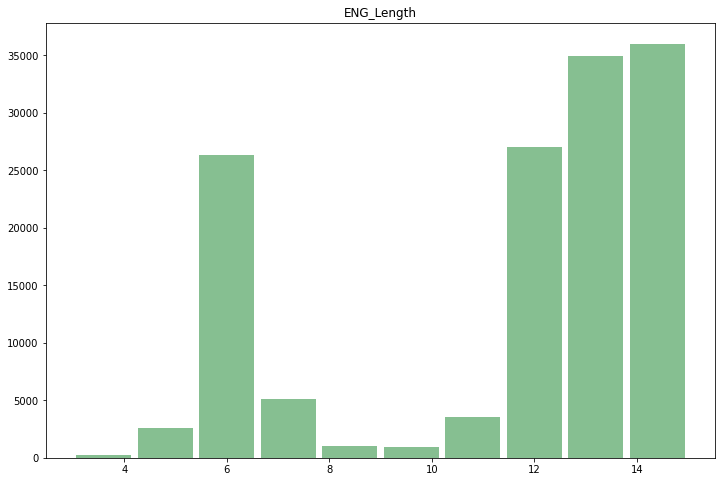

In [ ]:
#Visualize the distribution of the lengths of english sentences
df.hist(column= 'ENG_Length', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8da19e2690>]],
      dtype=object)

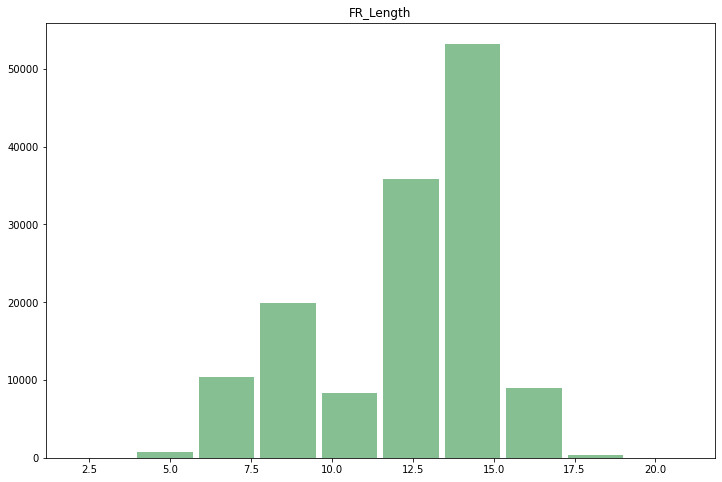

In [ ]:
#Visualize the distribution of the lengths of french sentences
df.hist(column= 'FR_Length',grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [ ]:
#Get the maximum length of an english sentence and the maximum length of a french sentence
ENG_max_value= df["ENG_Length"].max()
print('the maximum length of an english sentence is',ENG_max_value)
FR_max_value= df["FR_Length"].max()
print('the maximum length of a french sentence is',FR_max_value)

the maximum length of an english sentence is 15
the maximum length of a french sentence is 21


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

In [ ]:
#Tokonizar is a process that seperate paragraph into subsintinces and words.
# 2 Tokonizar has been build To tokenize english and french sentences
dataset= df.to_numpy()
from keras.preprocessing.text import Tokenizer
# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
print('English Vocabulary Size: %d' % eng_vocab_size)
# prepare french tokenizer
fre_tokenizer = create_tokenizer(dataset[:, 1])
fre_vocab_size = len(fre_tokenizer.word_index) + 1
print('French Vocabulary Size: %d' % fre_vocab_size)

English Vocabulary Size: 200
French Vocabulary Size: 345


In [ ]:
#Countting unique words in english and in french
from collections import Counter
english_words_counter = Counter([word for sentence in English for word in sentence.split()])
print('{} unique English words.'.format(len(english_words_counter)))
french_words_counter = Counter([word for sentence in French for word in sentence.split()])
print('{} unique French words.'.format(len(french_words_counter)))

14 unique English words.
15 unique French words.


####Padding

In [ ]:
#Perform padding on the sequences .
#Aftre Padding, the tow sentinces must to be at the same length
from keras.preprocessing.sequence import pad_sequences

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = eng_tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=21, padding='post')
	return X
# one hot encode target sequence
def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y


##Modeling

In [ ]:
#Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs.
#It will be good to lookup how to build Seq2Seq models,there are some new layers that will help you like RepeatVector and TimeDistributed.
from keras.models import Model
from keras.layers import Input, LSTM, RepeatVector
from keras.layers import TimeDistributed
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from numpy import array

def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

In [ ]:
# prepare training data
trainX = encode_sequences(eng_tokenizer, ENG_max_value, dataset[:, 0])
trainY = encode_sequences(fre_tokenizer, FR_max_value, dataset[:, 1])
trainY = encode_output(trainY, eng_vocab_size)
# prepare validation data
testX = encode_sequences(eng_tokenizer, ENG_max_value, dataset[:, 0])
testY = encode_sequences(fre_tokenizer, FR_max_value, dataset[:, 1])
testY = encode_output(testY, eng_vocab_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVector  (None, 21, 256)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 21, 256)           525312    
                                                                 
 time_distributed (TimeDistr  (None, 21, 345)          88665     
 ibuted)                                                         
                                                                 
Total params: 1,190,489
Trainable params: 1,190,489
Non-

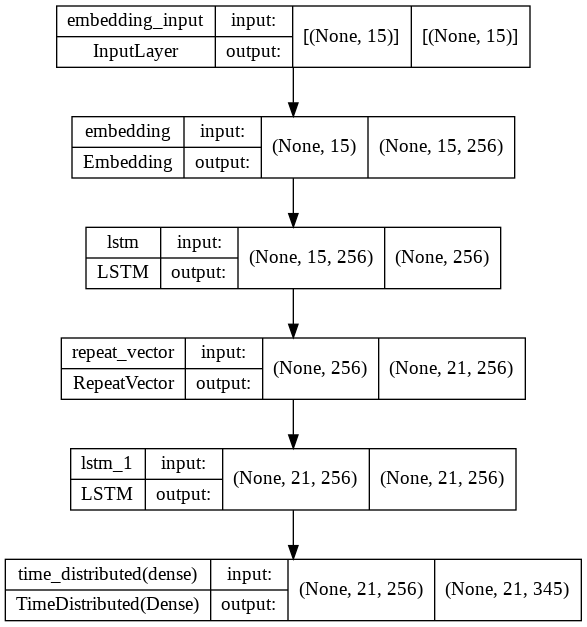

In [ ]:
# define model
model = define_model(eng_vocab_size,fre_vocab_size, ENG_max_value, FR_max_value, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')
# summarize defined model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

Compile and train the model. be patient the model might take A LOT of time to train.

In [ ]:
from keras.callbacks import ModelCheckpoint
# fit model
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

Epoch 1/10


ValueError: ignored

In [ ]:
# Define a function that gets an input sentence in english and gives the output sentence in the french language.
#Test the following sentence
input = "she is driving the truck"

def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """

    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'she is driving the truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.max(x)] for x in y[0]]))


Improving the model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation.

In [ ]:
, LSTMCellV2
# Create a new model called model2
#Build the bidirectional RNN model
def bi_embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
  model2 = Sequential()
  model2.add(Embedding(english_vocab_size, 100, input_length=input_shape[1], input_shape=input_shape[1:]))
  model2.add(Bidirectional(LSTM(128, return_sequences=True)))
  model2.add(Dropout(0.5))
  model2.add(Bidirectional(LSTM(128,  return_sequences=True)))
  model2.add(Dropout(0.5))
  model2.add(TimeDistributed(Dense(256, activation='relu')))
  model2.add(Dropout(0.5))
  model2.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))
  model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model2

In [ ]:
#compile and train the new model.
model2 = define_model (eng_vocab_size,fre_vocab_size, ENG_max_value, FR_max_value, 256)
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [ ]:
#Define a new function that relies on the new model to make predictions.
input = "she is driving the truck"
def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.

    #A variable to store our response word by word
    decoded_sentence = ''

    stop_condition = False
    while not stop_condition:
      #Predicting output tokens with probabilities and states
      output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
      #Choosing the one with highest probability
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_token = reverse_target_features_dict[sampled_token_index]
      decoded_sentence += " " + sampled_token#Stop if hit max length or found the stop token
      if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
        stop_condition = True
      #Update the target sequence
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      target_seq[0, 0, sampled_token_index] = 1.
      #Update states
      states_value = [hidden_state, cell_state]
    return decoded_sentence
#Test Your Zaka

**Adjustment in terms of architecture to improve the model:**

Increasing Number of attention heads, Batch size,No of epochs for training change Optimizer and its parameter might be able to improve the model.


**Additional ways to improve the performance of the model:**
*   WeightDrop in the encoder
*   Embedding dropout


